# Import libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Import data

In [124]:
dat = pd.read_csv('C:/Users/vishn/OneDrive/Desktop/pro int/counselling.csv')

# Pre- processing

In [125]:
dat.isnull().sum()

Rank           0
Nationality    0
10th           0
12th           0
Gender         0
Department     0
dtype: int64

In [126]:
dat.isna().sum()

Rank           0
Nationality    0
10th           0
12th           0
Gender         0
Department     0
dtype: int64

In [127]:
dat=dat.dropna()

In [128]:
dat

,Rank,Nationality,10th,12th,Gender,Department
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]"
1,11564,India,84,53,F,[Not Eligible]
2,4769,India,84,47,M,[Not Eligible]
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]"
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]"
...,...,...,...,...,...,...
694,12785,India,88,79,M,"[CS,Civil,Mech,Electronics,Electrical]"
695,12025,Nepal,91,60,M,[Not Eligible]
696,12308,Nepal,92,77,M,[Civil]
697,12631,Ethiopia,87,77,F,[Not Eligible]


In [129]:
dat.head()

,Rank,Nationality,10th,12th,Gender,Department
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]"
1,11564,India,84,53,F,[Not Eligible]
2,4769,India,84,47,M,[Not Eligible]
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]"
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]"


In [130]:
dat.tail()

,Rank,Nationality,10th,12th,Gender,Department
694,12785,India,88,79,M,"[CS,Civil,Mech,Electronics,Electrical]"
695,12025,Nepal,91,60,M,[Not Eligible]
696,12308,Nepal,92,77,M,[Civil]
697,12631,Ethiopia,87,77,F,[Not Eligible]
698,14276,Nepal,87,66,M,[Civil]


In [131]:
dat.shape

(699, 6)

In [132]:
dat.describe()

,Rank,10th,12th
count,699.000000,699.000000,699.000000
mean,8094.462089,85.742489,70.280401
std,4221.988076,6.052498,14.016826
min,57.000000,75.000000,45.000000
25%,4688.500000,81.000000,59.000000
50%,8125.000000,86.000000,70.000000
75%,12019.000000,91.000000,81.000000
max,14992.000000,96.000000,97.000000


In [133]:
dat.head()

,Rank,Nationality,10th,12th,Gender,Department
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]"
1,11564,India,84,53,F,[Not Eligible]
2,4769,India,84,47,M,[Not Eligible]
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]"
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]"


# Detecting Outliers

In [134]:
def find_outliers_IQR(dat):

   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   return outliers

In [135]:
outliers = find_outliers_IQR(dat["Rank"])

print("number of outliers:"+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers:699
max outlier value: Rank            NaN
Nationality    None
10th            NaN
12th            NaN
Gender         None
Department     None
dtype: object
min outlier value: Rank            NaN
Nationality    None
10th            NaN
12th            NaN
Gender         None
Department     None
dtype: object


C:\Users\vishn\AppData\Local\Temp\ipykernel_18028\561833786.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]


,Rank,Nationality,10th,12th,Gender,Department
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
694,NaN,NaN,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN,NaN,NaN
696,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Selection

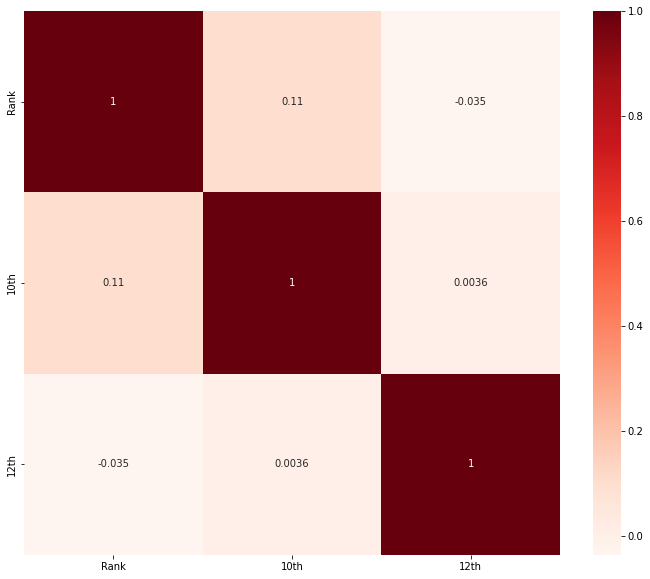

In [136]:
plt.figure(figsize=(12,10))
corr = dat.corr()
sb.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# One Hot encoding

In [137]:
dummies = pd.get_dummies(dat.Nationality)
dummies

,Ethiopia,India,Nepal
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
694,0,1,0
695,0,0,1
696,0,0,1
697,1,0,0


In [138]:
merged = pd.concat([dat,dummies],axis=1)
merged


,Rank,Nationality,10th,12th,Gender,Department,Ethiopia,India,Nepal
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]",0,1,0
1,11564,India,84,53,F,[Not Eligible],0,1,0
2,4769,India,84,47,M,[Not Eligible],0,1,0
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]",0,1,0
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]",0,1,0
...,...,...,...,...,...,...,...,...,...
694,12785,India,88,79,M,"[CS,Civil,Mech,Electronics,Electrical]",0,1,0
695,12025,Nepal,91,60,M,[Not Eligible],0,0,1
696,12308,Nepal,92,77,M,[Civil],0,0,1
697,12631,Ethiopia,87,77,F,[Not Eligible],1,0,0


In [139]:
data= merged.drop(['Nationality'], axis=1)
data


,Rank,10th,12th,Gender,Department,Ethiopia,India,Nepal
0,1595,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]",0,1,0
1,11564,84,53,F,[Not Eligible],0,1,0
2,4769,84,47,M,[Not Eligible],0,1,0
3,7669,89,92,F,"[Civil,Mech,Electronics,Electrical]",0,1,0
4,6479,76,90,F,"[Civil,Mech,Electronics,Electrical]",0,1,0
...,...,...,...,...,...,...,...,...
694,12785,88,79,M,"[CS,Civil,Mech,Electronics,Electrical]",0,1,0
695,12025,91,60,M,[Not Eligible],0,0,1
696,12308,92,77,M,[Civil],0,0,1
697,12631,87,77,F,[Not Eligible],1,0,0


# Dependent and ind variables

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [141]:
x=data.iloc[:,[0,1,2,5,6,7]]

In [142]:
X.head()

,Rank,10th,12th,Ethiopia,India,Nepal
0,1595,85,94,0,1,0
1,11564,84,53,0,1,0
2,4769,84,47,0,1,0
3,7669,89,92,0,1,0
4,6479,76,90,0,1,0


In [143]:
y = data.iloc[:,[4]]

In [144]:
y.head()

,Department
0,"[CS,Civil,Mech,Electronics,Electrical]"
1,[Not Eligible]
2,[Not Eligible]
3,"[Civil,Mech,Electronics,Electrical]"
4,"[Civil,Mech,Electronics,Electrical]"


# Train test Split(train-70%,test-30%)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30)

# library to visualize missing values

In [146]:
import missingno as msno

<AxesSubplot:>

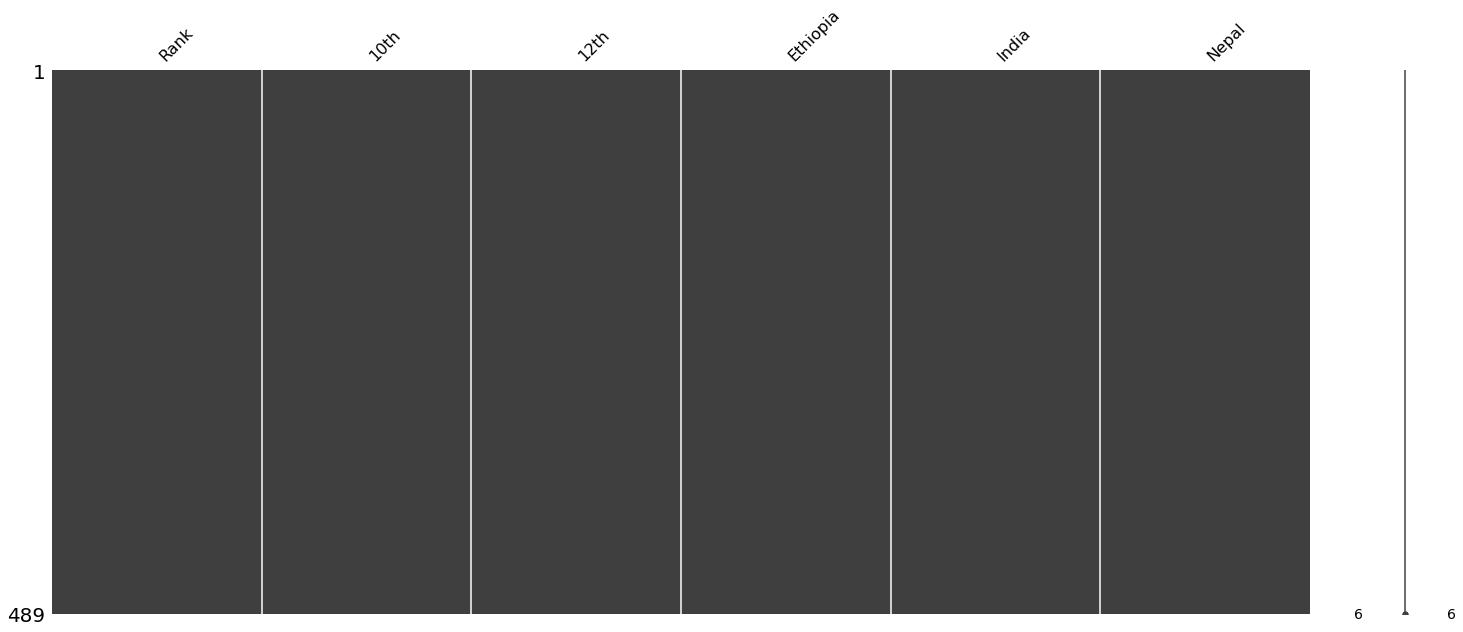

In [147]:
msno.matrix(X_train.sample(489))

In [148]:
X_train.shape , X_test.shape

((489, 6), (210, 6))

# Building ML Models

In [149]:
dt = DecisionTreeClassifier()

In [150]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
test = dt.predict(X_test)

In [152]:
test

array(['[Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[CS,Civil,Mech,Electronics,Electrical]', '[Civil]',
       '[CS,Civil,Mech,Electronics,Electrical]', '[Civil]',
       '[Civil,Mech,Electrical]', '[Not Eligible]', '[Not Eligible]',
       '[Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electronics,Electrical]',
       '[CS,Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electronics,Electrical]', '[Civil,Mech,Electrical]',
       '[Not Eligible]', '[Civil,Mech,Electrical]',
       '[CS,Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[CS,Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[Civil,Electrical]', '[Civil,Mech,Electrical]',
       '[Civil,Electrical]', '[Civil]', '[Not Eligible]',
       '[Not Eligible]', '[Not Eligible]', '[Civil,Mech,Electrical]',
       '[Not Eligible]', '[Not Eligible]', '[Not Eligible]',
       '[Civil,Electrical]', '[Not Eligible]', '[Not Eligible]',
       '[Civil,Mech,Electronics,Elec

In [153]:
y_test

,Department
617,[Not Eligible]
289,[Not Eligible]
505,"[CS,Civil,Mech,Electronics,Electrical]"
75,[Civil]
441,"[CS,Civil,Mech,Electronics,Electrical]"
...,...
613,"[Civil,Mech,Electrical]"
73,[Not Eligible]
385,"[Civil,Mech,Electronics,Electrical]"
470,"[CS,Civil,Mech,Electronics,Electrical]"


In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
accuracy = accuracy_score(y_test, test)

In [156]:
accuracy

0.8523809523809524

# Save model For Implementation

In [157]:
import joblib

In [158]:
joblib.dump(dt,'counselling_mod.joblib')

['counselling_mod.joblib']

In [102]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [103]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[21,  0,  0,  1,  1,  2],
       [ 0, 16,  2,  0,  2,  0],
       [ 0,  1, 10,  2,  1,  1],
       [ 0,  0,  0, 36,  0,  3],
       [ 1,  0,  0,  0, 19,  1],
       [ 3,  0,  5,  5,  1, 76]], dtype=int64)

C:\Users\vishn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


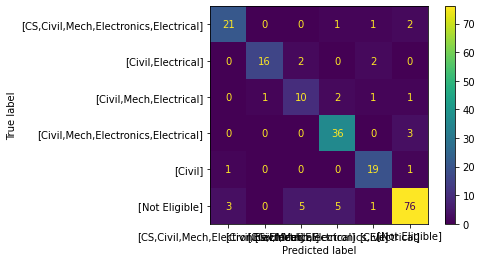

In [104]:
plot_confusion_matrix(dt, X_test, y_test)

In [105]:
print(classification_report(y_test, test))

                                        precision    recall  f1-score   support

[CS,Civil,Mech,Electronics,Electrical]       0.84      0.84      0.84        25
                    [Civil,Electrical]       0.94      0.80      0.86        20
               [Civil,Mech,Electrical]       0.59      0.67      0.62        15
   [Civil,Mech,Electronics,Electrical]       0.82      0.92      0.87        39
                               [Civil]       0.79      0.90      0.84        21
                        [Not Eligible]       0.92      0.84      0.88        90

                              accuracy                           0.85       210
                             macro avg       0.82      0.83      0.82       210
                          weighted avg       0.86      0.85      0.85       210



# K-NN classifier

In [34]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)  

In [35]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  

# feature Scaling

In [36]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [37]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

C:\Users\vishn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [38]:
y_pred= classifier.predict(x_test) 

In [39]:
y_pred

array(['[Not Eligible]', '[Civil,Mech,Electrical]', '[Not Eligible]',
       '[Not Eligible]', '[Civil,Electrical]', '[Civil]',
       '[Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[Not Eligible]', '[CS,Civil,Mech,Electronics,Electrical]',
       '[CS,Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electrical]', '[Civil,Electrical]',
       '[Civil,Mech,Electronics,Electrical]',
       '[CS,Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[CS,Civil,Mech,Electronics,Electrical]', '[Civil]',
       '[Not Eligible]', '[Civil]', '[Not Eligible]', '[Not Eligible]',
       '[Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[Not Eligible]', '[Civil,Mech,Electronics,Electrical]',
       '[Civil,Mech,Electronics,Electrical]', '[Not Eligible]',
       '[Not Eligible]', '[Not Eligible]', '[Civil,Mech,Electrical]',
       '[Civil,Electrical]', '[Civil,

# Creating confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [41]:
cm

array([[22,  0,  1,  2,  1,  3],
       [ 0, 11,  3,  1,  0,  0],
       [ 0,  0,  8,  2,  1,  1],
       [ 2,  1,  2, 31,  2,  4],
       [ 2,  3,  0,  0, 11,  3],
       [ 2,  2,  5,  2,  5, 77]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
accuracy = accuracy_score(y_test, test)

In [44]:
accuracy

0.24285714285714285

In [45]:
print(classification_report(y_test, test))

                                        precision    recall  f1-score   support

[CS,Civil,Mech,Electronics,Electrical]       0.10      0.07      0.08        29
                    [Civil,Electrical]       0.11      0.13      0.12        15
               [Civil,Mech,Electrical]       0.05      0.08      0.06        12
   [Civil,Mech,Electronics,Electrical]       0.19      0.17      0.18        42
                               [Civil]       0.09      0.16      0.12        19
                        [Not Eligible]       0.45      0.39      0.42        93

                              accuracy                           0.24       210
                             macro avg       0.16      0.17      0.16       210
                          weighted avg       0.27      0.24      0.25       210



# Naive Bayes

In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)  

In [47]:
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [48]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

C:\Users\vishn\AppData\Local\Temp\ipykernel_7440\1006888206.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
accuracy = accuracy_score(y_test, test)

In [51]:
print(accuracy)

0.24285714285714285
